In [6]:
import cv2  #opencv读取的格式是BGR
import numpy as np
import matplotlib.pyplot as plt  #Matplotlib是RGB

In [7]:
img = cv2.imread('img/cat.jpg')
img_graw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_graw.shape

(414, 500)

In [8]:
def show(img):
    cv2.imshow('img', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [9]:
show(img)

### HSV
- H - 色调（主波长）。 
- S - 饱和度（纯度/颜色的阴影）。 
- V值（强度）

In [10]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# show()

### 图像阈值

#### ret, dst = cv2.threshold(src, thresh, maxval, type)

- src： 输入图，只能输入单通道图像，通常来说为灰度图
- dst： 输出图
- thresh： 阈值
- maxval： 当像素值超过了阈值（或者小于阈值，根据type来决定），所赋予的值
- type：二值化操作的类型，包含以下5种类型： cv2.THRESH_BINARY； cv2.THRESH_BINARY_INV； cv2.THRESH_TRUNC； cv2.THRESH_TOZERO；cv2.THRESH_TOZERO_INV

- cv2.THRESH_BINARY           超过阈值部分取maxval（最大值），否则取0
- cv2.THRESH_BINARY_INV    THRESH_BINARY的反转
- cv2.THRESH_TRUNC            大于阈值部分设为阈值，否则不变
- cv2.THRESH_TOZERO          大于阈值部分不改变，否则设为0
- cv2.THRESH_TOZERO_INV  THRESH_TOZERO的反转


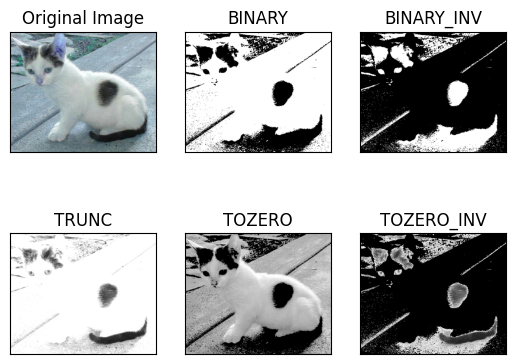

In [11]:
ret, thresh1 = cv2.threshold(img_graw, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img_graw, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img_graw, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img_graw, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img_graw, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2, 3, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

### 图像平滑
![title](img/t.png)

In [14]:
img = cv2.imread('img/lenaNoise.png')

In [15]:
show(img)

In [16]:
#均值滤波 简短平均卷积操作
blur=cv2.blur(img,(3,3))
show(blur)

In [21]:
#方框滤波，基本和均值一样，可以归一化
box = cv2.boxFilter(img,-1,(3,3), normalize=True)  
show(box)

In [23]:
# 方框滤波
# 基本和均值一样，可以选择归一化,容易越界
box = cv2.boxFilter(img,-1,(3,3), normalize=False)  
show(box)

In [25]:
#高斯模糊的卷积核里的数值是满足高斯分布，相当于更重视中间的
aussian=cv2.GaussianBlur(img,(5,5),1)
show(aussian)

In [26]:
# 中值滤波
# 相当于用中值代替
median = cv2.medianBlur(img, 5)  # 中值滤波
show(median)

In [28]:
#展示对比
res=np.hstack((blur,aussian,median))
cv2.imshow('median vs average', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 形态学 -腐蚀操作

In [29]:
img = cv2.imread('img/dige.png')
show(img)

In [30]:
kernel= np.ones((3,3),np.uint8)

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [32]:
erosion=cv2.erode(img,kernel,iterations=1)
show(erosion)

In [33]:
pie=cv2.imread('img/pie.png')
show(pie)

In [34]:
kernel = np.ones((30,30),np.uint8) 

In [37]:
erosion_1 = cv2.erode(pie,kernel,iterations = 1)
erosion_2 = cv2.erode(pie,kernel,iterations = 2)
erosion_3 = cv2.erode(pie,kernel,iterations = 3)
res=np.hstack((erosion_1,erosion_2,erosion_3))
show(res)

### 形态学 膨胀

In [ ]:
img = cv2.imread('img/dige.png')
kernel= np.ones((3,3),np.uint8)
dige_dilate=cv2.erode(img,kernel,iterations = 1)

dilate=cv2.dilate(dige_dilate,kernel,iterations = 1)
show(dilate)

In [43]:
pie = cv2.imread('img/pie.png')

kernel = np.ones((30,30),np.uint8) 
dilate_1 = cv2.dilate(pie,kernel,iterations = 1)
dilate_2 = cv2.dilate(pie,kernel,iterations = 2)
dilate_3 = cv2.dilate(pie,kernel,iterations = 3)
res = np.hstack((dilate_1,dilate_2,dilate_3))
show(res)

### 开运算与闭运算

In [45]:
#开运算=先腐蚀，再膨胀
img=cv2.imread('img/dige.png')

kernel=np.ones((5,5),np.uint8)
opening=cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel)
show(opening)

In [46]:
#闭运算，先膨胀，再腐蚀
closing=cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel)
show(closing)

### 梯度运算

In [48]:
# 梯度=膨胀-腐蚀
pie=cv2.imread('img/pie.png')
kernel=np.ones((7,7),np.uint8)
dilate = cv2.dilate(pie,kernel,iterations = 5)
erosion = cv2.erode(pie,kernel,iterations = 5)
res=np.hstack((dilate,erosion))
show(res)

In [49]:
gradient=cv2.morphologyEx(pie,cv2.MORPH_GRADIENT,kernel)
show(gradient)

### 礼帽与黑帽
- 礼帽 = 原始输入-开运算结果
- 黑帽 = 闭运算-原始输入

In [50]:
#礼帽
img = cv2.imread('img/dige.png')
kernel=np.ones((5,5),np.uint8)
tophat=cv2.morphologyEx(img,cv2.MORPH_TOPHAT,kernel)
show(tophat)

In [51]:
#黑帽
img = cv2.imread('img/dige.png')
kernel=np.ones((5,5),np.uint8)
tophat=cv2.morphologyEx(img,cv2.MORPH_BLACKHAT,kernel)
show(tophat)

### 图像梯度-Sobel算子
![title](img/sobel_1.png)

In [52]:
img = cv2.imread('img/pie.png',cv2.IMREAD_GRAYSCALE)
show(img)

dst = cv2.Sobel(src, ddepth, dx, dy, ksize)
- ddepth:图像的深度
- cv2.CV_64F 可以表示负数
- dx和dy分别表示水平和竖直方向
- ksize是Sobel算子的大小

In [53]:

sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
show(sobelx)

In [54]:
#水平方向，右减左 白到黑是正数，黑到白就是负数了，所有的负数会被截断成0，所以要取绝对值
sobelx = cv2.convertScaleAbs(sobelx)
show(sobelx)

In [56]:
#垂直方向
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobely = cv2.convertScaleAbs(sobely)  
show(sobely)

In [57]:
#分别计算完成x和y方向后，再求和
sobelxy = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)
show(sobelxy)

In [58]:
img = cv2.imread('img/lena.jpg',cv2.IMREAD_GRAYSCALE)
show(img)

In [60]:
img = cv2.imread('img/lena.jpg',cv2.IMREAD_GRAYSCALE)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobely = cv2.convertScaleAbs(sobely)
sobelxy = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)
show(sobelxy)

In [62]:
img = cv2.imread('img/lena.jpg',cv2.IMREAD_GRAYSCALE)
sobelxy=cv2.Sobel(img,cv2.CV_64F,1,1,ksize=3)
sobelxy = cv2.convertScaleAbs(sobelxy) 
show(sobelxy)

### 图像梯度-Scharr算子
![title](img/scharr.png)

### 图像梯度-laplacian算子
![title](img/l.png)

In [63]:
#不同算子的差异
img = cv2.imread('img/lena.jpg',cv2.IMREAD_GRAYSCALE)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)   
sobely = cv2.convertScaleAbs(sobely)  
sobelxy =  cv2.addWeighted(sobelx,0.5,sobely,0.5,0)  

scharrx = cv2.Scharr(img,cv2.CV_64F,1,0)
scharry = cv2.Scharr(img,cv2.CV_64F,0,1)
scharrx = cv2.convertScaleAbs(scharrx)   
scharry = cv2.convertScaleAbs(scharry)  
scharrxy =  cv2.addWeighted(scharrx,0.5,scharry,0.5,0) 

laplacian = cv2.Laplacian(img,cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)   

res = np.hstack((sobelxy,scharrxy,laplacian))
show(res)

### Canny边缘检测
- 1)        使用高斯滤波器，以平滑图像，滤除噪声。

- 2)        计算图像中每个像素点的梯度强度和 方向 arcTan(梯度)。

- 3)        应用非极大值（Non-Maximum Suppression）抑制，以消除边缘检测带来的杂散响应。

- 4)        应用双阈值（Double-Threshold）检测来确定真实的和潜在的边缘。

- 5)        通过抑制孤立的弱边缘最终完成边缘检测。

#### 1:高斯滤波器
![title](img/canny_1.png)

#### 2:梯度和方向
![title](img/canny_2.png)

#### 3：非极大值抑制
![title](img/canny_3.png)

![title](img/canny_6.png)

#### 4：双阈值检测
![title](img/canny_5.png)

In [64]:
img=cv2.imread("img/lena.jpg",cv2.IMREAD_GRAYSCALE)
v1=cv2.Canny(img,80,150)
v2=cv2.Canny(img,50,100)
res=np.hstack((v1,v2))
show(res)

In [66]:
img=cv2.imread("img/car.png",cv2.IMREAD_GRAYSCALE)

v1=cv2.Canny(img,120,250)
v2=cv2.Canny(img,50,100)

res = np.hstack((v1,v2))
show(res)